# Individuell inlämningsuppgift
## BI25 Python och verksamhetsstödjande visualisering
### *Michael Broström, michael@intertec.se, 0706683090*


In [159]:
# Jag tar och börjar med det viktigaste - importera paket. Här fyller jag på efter hand. 
 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


## Del 1. Läs in och utforska data. 

### Uppgift 1.1: Hämta in data. 

I mitt fall har jag filen i mappen Hämtade filer. Vid leverans av uppgiften hoppas jag komma ihåg att ändra kommenteringen så att du får ange sökväg till filen på din dator. 

In [160]:
data = "d:/downloads/agent_data.csv" #Lokal sökväg

# Kommentera bort raden ovan och ta bort # från raden nedan

# data = input("Ange sökvägen till agent_data.csv-filen")

df = pd.read_csv(data)

df.head()
# Körde en liten koll för att se om filen togs in ordentligt. Lät detta ligga som kommentar ifall jag vill köra den igen.

,Prompt_ ID_,Timestamp_,Customer_ Name_,Customer_ Segment_,City_,Country_,Agent_ Name_,LLM_ Model_,Compute_ Cost_ EUR_,Customer_ Price_ EUR_,Response_ Time_,Use_ Case_,Prompt_ Length_,Access_ Method_
0,20fdb890-8d9e-11f0-b4d9-0a623090504c,2024-01-01 08:00:00,Garmo Tech A/S,Consultancy,Copenhagen,Denmark,agent-auditor,orion-k4,0.0093,0.0127,290,Reporting,57,Web
1,2f2be192-8d9e-11f0-bc2c-0a623090504c,2024-01-01 08:00:02,NordicAI Solutions AS,Startup,Oslo,Norway,agent-analytics,kiwi-2.i,0.0136,0.0222,424,Data Analysis,168,App
2,2a854025-8d9e-11f0-b7fc-0a623090504c,2024-01-01 08:00:03,NeuroNova AB,Startup,Stockholm,Sweden,agent-analytics,sagitta-4.i,0.0062,0.0100,1566,Data Analysis,114,Web
3,309ae819-8d9e-11f0-9fa6-0a623090504c,2024-01-01 08:00:05,NovaLogic AB,Startup,Stockholm,Sweden,agent-support,"kiwi-2.i, alva-1.i, orion-k3, orion-k4",0.0238,0.0448,3165,Customer Support,184,Plugin
4,24d71ab2-8d9e-11f0-87f2-0a623090504c,2024-01-01 08:00:05,novalogicab,Startup,Stockholm,Sweden,agent-support,maya-1.i,0.0073,0.0109,375,Customer Support,70,Web


### Uppgift 1.2: Presentera kolumner och datatyper

Vid första anblicken ser det ut som att kolumnnamen är rimliga, med undantag för blanksteg i namnen samt det onödiga understrecket i slutet (jag behöll versal/gemen - jag gillar det, även om det kanske inte är "pandas style"!).  Efter namnjustering görs datatypkonvertering här. 


In [161]:
df.info()   # Kolla hur det ser ut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563458 entries, 0 to 563457
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prompt_ ID_            563458 non-null  object 
 1   Timestamp_             563458 non-null  object 
 2   Customer_ Name_        563458 non-null  object 
 3   Customer_ Segment_     563458 non-null  object 
 4   City_                  563458 non-null  object 
 5   Country_               563458 non-null  object 
 6   Agent_ Name_           563458 non-null  object 
 7   LLM_ Model_            563458 non-null  object 
 8   Compute_ Cost_ EUR_    563458 non-null  float64
 9   Customer_ Price_ EUR_  563458 non-null  float64
 10  Response_ Time_        563458 non-null  int64  
 11  Use_ Case_             518219 non-null  object 
 12  Prompt_ Length_        563458 non-null  int64  
 13  Access_ Method_        551474 non-null  object 
dtypes: float64(2), int64(2), object(10)


Byt namn med hjälp av en mapping.

In [162]:
# I stället för att byta namn lite trögt på varje enskild kolumn så kör vi en mapping så att det blir lite snyggare hantering

# Som noterat ovan behålls versal/gemen samt ett underscore medan blanksteg tas bort och ett onödigt avslutande underscore stryks.


rename_map = {
    "Prompt_ ID_": "Prompt_ID",
    "Timestamp_": "Timestamp",
    "Customer_ Name_": "Customer_Name",
    "Customer_ Segment_": "Customer_Segment",
    "City_": "City",
    "Country_": "Country",
    "Agent_ Name_": "Agent_Name",
    "LLM_ Model_": "LLM_Model",
    "Compute_ Cost_ EUR_": "Compute_Cost_EUR",
    "Customer_ Price_ EUR_": "Customer_Price_EUR",
    "Response_ Time_": "Response_Time",
    "Use_ Case_": "Use_Case",
    "Prompt_ Length_": "Prompt_Length",
    "Access_ Method_": "Access_Method",
}

In [163]:
df = df.rename(columns=rename_map)

df.info()  #Snabb koll så att alla namn blivit korrekta (spoiler: det tog tre försök p.g.a. slarv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563458 entries, 0 to 563457
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Prompt_ID           563458 non-null  object 
 1   Timestamp           563458 non-null  object 
 2   Customer_Name       563458 non-null  object 
 3   Customer_Segment    563458 non-null  object 
 4   City                563458 non-null  object 
 5   Country             563458 non-null  object 
 6   Agent_Name          563458 non-null  object 
 7   LLM_Model           563458 non-null  object 
 8   Compute_Cost_EUR    563458 non-null  float64
 9   Customer_Price_EUR  563458 non-null  float64
 10  Response_Time       563458 non-null  int64  
 11  Use_Case            518219 non-null  object 
 12  Prompt_Length       563458 non-null  int64  
 13  Access_Method       551474 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 60.2+ MB


Korrigera datatyper med ett schema. Eftersom många textkolumner har ett begränsat antal olika värden har category valts där. 

In [164]:
# Även här görs hanteringen lite smidigare i stället för att kludda med kolumn efter kolumn. 

# Datatyperna är relativt självklara när man tittar på materialet. Category är smidigt eftersom det ger en lite egen hantering och bättre prestanda.


schema = {
    "Prompt_ID": {"dtype": "string"},
    "Timestamp": {"dtype": "datetime64[ns]"},
    "Customer_Name": {"dtype": "category"},
    "Customer_Segment": {"dtype": "category"},
    "City": {"dtype": "category"},
    "Country": {"dtype": "category"},
    "Agent_Name": {"dtype": "category"},
    "LLM_Model": {"dtype": "category"},
    "Compute_Cost_EUR": {"dtype": "float32"},
    "Customer_Price_EUR": {"dtype": "float32"},
    "Response_Time": {"dtype": "int32"},
    "Use_Case": {"dtype": "category"},
    "Prompt_Length": {"dtype": "int32"},
    "Access_Method": {"dtype": "category"},
}

Loopa igenom kolumnerna och konvertera enligt schema. Koden är skamlöst stulen av en klok människa och har masserats för att ta med hela tidsstämpeln.

In [165]:
for col, datatype in schema.items():
    if col not in df.columns:
        continue

    dtype = datatype.get("dtype")

    if "datetime" in dtype:
        df[col] = pd.to_datetime(df[col], errors="coerce") 
    else:
        df[col] = df[col].astype(dtype, errors="ignore")


In [166]:
df.info(   )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563458 entries, 0 to 563457
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Prompt_ID           563458 non-null  string        
 1   Timestamp           563458 non-null  datetime64[ns]
 2   Customer_Name       563458 non-null  category      
 3   Customer_Segment    563458 non-null  category      
 4   City                563458 non-null  category      
 5   Country             563458 non-null  category      
 6   Agent_Name          563458 non-null  category      
 7   LLM_Model           563458 non-null  category      
 8   Compute_Cost_EUR    563458 non-null  float32       
 9   Customer_Price_EUR  563458 non-null  float32       
 10  Response_Time       563458 non-null  int32         
 11  Use_Case            518219 non-null  category      
 12  Prompt_Length       563458 non-null  int32         
 13  Access_Method       551474 no

### Uppgift 1.3 (och 1.4 av bara farten): Hantera nullvärden
Enligt uppgift saknas data i kolumnen Access_Method på vissa rader och därför byter vi null-värden där mot "CLI" enligt instruktion. Vi kollar även övriga kolumner och ser hur där ser ut. 

In [167]:
df.isnull().sum() # Vi dubbelkollar. Man vet ju aldrig ... 

Prompt_ID                 0
Timestamp                 0
Customer_Name             0
Customer_Segment          0
City                      0
Country                   0
Agent_Name                0
LLM_Model                 0
Compute_Cost_EUR          0
Customer_Price_EUR        0
Response_Time             0
Use_Case              45239
Prompt_Length             0
Access_Method         11984
dtype: int64

Jag ser att även Use_Case har null-värden. Eftersom detta inte har nämnts i uppgiften får jag fatta ett eget beslut. Jag väljer att ändra detta till "Unknown" i stället eftersom det ger tryggare hantering av aggregering, filtrering, etc. och minska risken för en krasch nånstans. Eftersom jag valt category som datatyp skapar jag först de två kategorierna CLI respektive Unknown. 

In [168]:
# Lägg till kategori först och sedan korrigera nullvärden.

df["Access_Method"] = df["Access_Method"].cat.add_categories("CLI")  
df["Access_Method"] = df["Access_Method"].fillna("CLI")

df["Use_Case"] = df["Use_Case"].cat.add_categories("Unknown")
df["Use_Case"] = df["Use_Case"].fillna("Unknown")


In [169]:
df.isnull().sum() # Vi dubbelkollar igen. Trust, but verify.

Prompt_ID             0
Timestamp             0
Customer_Name         0
Customer_Segment      0
City                  0
Country               0
Agent_Name            0
LLM_Model             0
Compute_Cost_EUR      0
Customer_Price_EUR    0
Response_Time         0
Use_Case              0
Prompt_Length         0
Access_Method         0
dtype: int64

Innan jag släpper detta så vill jag kolla om det finns någon "röd tråd" där Use_Case är null (eller "Unknown" som jag nu ändrat det till.)

In [170]:
unknown_df = df[df["Use_Case"] == "Unknown"]

summary = {}

for col in unknown_df.columns:
    if pd.api.types.is_datetime64_any_dtype(unknown_df[col]):
        summary[col] = unknown_df[col].dt.strftime("%Y-%m-%d %H:%M:%S").value_counts(dropna=False).head(10)
    else:
        summary[col] = unknown_df[col].value_counts(dropna=False).head(10)

for col, counts in summary.items():
    print(f"Top 10 for column {col}:\n{counts}\n")


Top 10 for column Prompt_ID:
Prompt_ID
3b607e53-8d9e-11f0-99ec-0a623090504c    1
3afe2331-8d9e-11f0-afa5-0a623090504c    1
3b3ec532-8d9e-11f0-b13e-0a623090504c    1
2ebbf1ab-8d9e-11f0-9148-0a623090504c    1
2c0a181f-8d9e-11f0-9cf1-0a623090504c    1
40467ee7-8d9e-11f0-bf10-0a623090504c    1
233451d9-8d9e-11f0-b127-0a623090504c    1
364dde9a-8d9e-11f0-9c61-0a623090504c    1
3fe03579-8d9e-11f0-b4c8-0a623090504c    1
40e384fe-8d9e-11f0-80fb-0a623090504c    1
Name: count, dtype: Int64

Top 10 for column Timestamp:
Timestamp
2025-03-06 15:00:12    4
2024-10-23 14:15:59    3
2024-04-25 12:30:16    3
2024-03-14 12:15:14    3
2024-03-04 13:00:34    3
2024-10-28 09:15:22    3
2024-10-17 08:30:40    3
2024-02-12 15:45:59    3
2024-01-30 11:15:36    3
2024-09-26 15:45:02    3
Name: count, dtype: int64

Top 10 for column Customer_Name:
Customer_Name
NeuroNova AB          7162
Waver Group AB        6373
Kira Consulting AB    6051
AlvAI AB              3965
NovaLogic AB          2975
novalogicab     

Att döma av resultatet ovan finns ingen direkt röd tråd för "Unknown" Use_Case så jag släpper det så länge. Får återkomma till detta om jag stöter på något annat längre fram.

### Uppgift 1.5: Koll av datakvalitet.
Nu när vi fått in underlaget, korrigerat namnen och ersatt null-värden kan det vara intressant att se hur många kategorier som finns i varje category-kolumn samt "städa" lite i allmänhet. 

In [171]:
# Loopa genom category-kolumnerna och visa de olika kategorierna så vi kan se hur det ser ut. 

for col in df.select_dtypes(include=["category"]).columns:
    num_categories = len(df[col].cat.categories)
    print(f"{col}: {num_categories} kategorier")
    for category in df[col].cat.categories:
        print(f"  - {category}")
    print()


Customer_Name: 23 kategorier
  - AlvAI AB
  - Best Practice LLC
  - DataForge Inc
  - DataSphere Ltd
  - DreamMinds AS
  - Elytic LLC
  - Garmo Tech A/S
  - Geostar Ltd
  - HyperByte Inc
  - Kira Consulting AB
  - Lumivaara Oy
  - MiTech GmbH
  - NOVALOGIC  AB
  - NeuroNova AB
  - Neurolytics GmbH
  - NordicAI Solutions AS
  - NovaLogic AB
  - SmartData AB
  - Storsjö Sjukhus
  - TechNova AS
  - Tekoälyverkko Oy
  - Waver Group AB
  - novalogicab

Customer_Segment: 4 kategorier
  - Consultancy
  - Enterprise
  - Public Sector
  - Startup

City: 15 kategorier
  - 'stockholm
  - Berlin
  - Copenhagen
  - Frankfurt
  - Gothenburg
  - Helsinki
  - London
  - Malmö
  - New York
  - Oslo
  - San Francisco
  - Stockholm
  - Toronto
  - Vancouver
  - Östersund

Country: 10 kategorier
  - 'sweden
  - Canada
  - Denmark
  - Finland
  - Germany
  - Norway
  - Sweden
  - Swedne
  - UK
  - USA

Agent_Name: 5 kategorier
  - agent-analytics
  - agent-auditor
  - agent-scheduler
  - agent-support
  - 

Jag ser att jag missbedömt LLM_Model som nu har tusentals kategorier. Jag återställer den datatypen till string. Dessutom korrigerar jag "'stockholm" samt "Swedne" och "'sweden". Även NovaLogic korrigeras eftersom den kunden finns i tre varianter. 

In [172]:
# Byt tillbaka
 
df["LLM_Model"] = df["LLM_Model"].astype("string")

# Korrigera fel i City, Country och Customer_Name

df.loc[df["City"] == "'stockholm", "City"] = "Stockholm"
df.loc[df["Country"].isin(["'sweden", "Swedne"]), "Country"] = "Sweden"
df.loc[df["Customer_Name"].isin(["novalogicab", "NOVALOGIC  AB"]), "Customer_Name"] = "NovaLogic AB"

# Ta bort de felaktiga kategorierna.
df["City"] = df["City"].cat.remove_unused_categories()
df["Country"] = df["Country"].cat.remove_unused_categories()
df["Customer_Name"] = df["Customer_Name"].cat.remove_unused_categories()

# Så gör vi en koll av kategorierna igen och ser om filen nu är rimligt färdig för nästa steg. 

In [173]:
# Loopa genom category-kolumnerna igen så vi kan se att allt ser rätt ut nu. 

for col in df.select_dtypes(include=["category"]).columns:
    num_categories = len(df[col].cat.categories)
    print(f"{col}: {num_categories} kategorier")
    for category in df[col].cat.categories:
        print(f"  - {category}")
    print()


Customer_Name: 21 kategorier
  - AlvAI AB
  - Best Practice LLC
  - DataForge Inc
  - DataSphere Ltd
  - DreamMinds AS
  - Elytic LLC
  - Garmo Tech A/S
  - Geostar Ltd
  - HyperByte Inc
  - Kira Consulting AB
  - Lumivaara Oy
  - MiTech GmbH
  - NeuroNova AB
  - Neurolytics GmbH
  - NordicAI Solutions AS
  - NovaLogic AB
  - SmartData AB
  - Storsjö Sjukhus
  - TechNova AS
  - Tekoälyverkko Oy
  - Waver Group AB

Customer_Segment: 4 kategorier
  - Consultancy
  - Enterprise
  - Public Sector
  - Startup

City: 14 kategorier
  - Berlin
  - Copenhagen
  - Frankfurt
  - Gothenburg
  - Helsinki
  - London
  - Malmö
  - New York
  - Oslo
  - San Francisco
  - Stockholm
  - Toronto
  - Vancouver
  - Östersund

Country: 8 kategorier
  - Canada
  - Denmark
  - Finland
  - Germany
  - Norway
  - Sweden
  - UK
  - USA

Agent_Name: 5 kategorier
  - agent-analytics
  - agent-auditor
  - agent-scheduler
  - agent-support
  - agent-writer

Use_Case: 8 kategorier
  - Code Generation
  - Creative Wri

Och så en sista test av materialet med en dubbelkoll så att inga dubbletter finns i det jag vill ha som index. 

In [174]:
# Dubblettkontroll

has_duplicates = df["Prompt_ID"].duplicated().any()
print(f"Finns dubbletter i Prompt_ID? {has_duplicates}")


Finns dubbletter i Prompt_ID? False



Då stänger vi butiken för Del 1.


## 

# Del 2: Modeller och agenter
___

### Uppgift 2.1: Visualisera olika LLMs och visa hur många prompter varje modell hanterat.

Eftersom en och samma prompt kan använda flera LLM "exploderar" vi kolumnen på kommantecken så att vi kan räkna antalet LLM. Eftersom en LLM kan ingå flera gånger i en prompt får vi ta endast unika värden. Viktigt att strippa blanksteg eftersom inmatningen tycks ha varit sådär.  

In [ ]:
# Totalt antal unika förekomster per modell
model_counts = (
    df["LLM_Model"]
      .str.split(",")
      .explode()
      .str.strip()
      .reset_index()
      .groupby("LLM_Model")["index"].nunique()
      .sort_values(ascending=False)
)

print(model_counts)


LLM_Model
sagitta-3.i    147879
orion-k4       125452
nordix-7.i     109308
sagitta-4.i    101590
orion-k3        93368
maya-1.i        85475
kiwi-2.i        68945
bonus-5.i       60580
alva-1.i        52217
Name: index, dtype: int64


Nu när vi ser hur underlaget ser ut gör vi en fin visualisering av detta. Jag återanvänder koden ovan. 

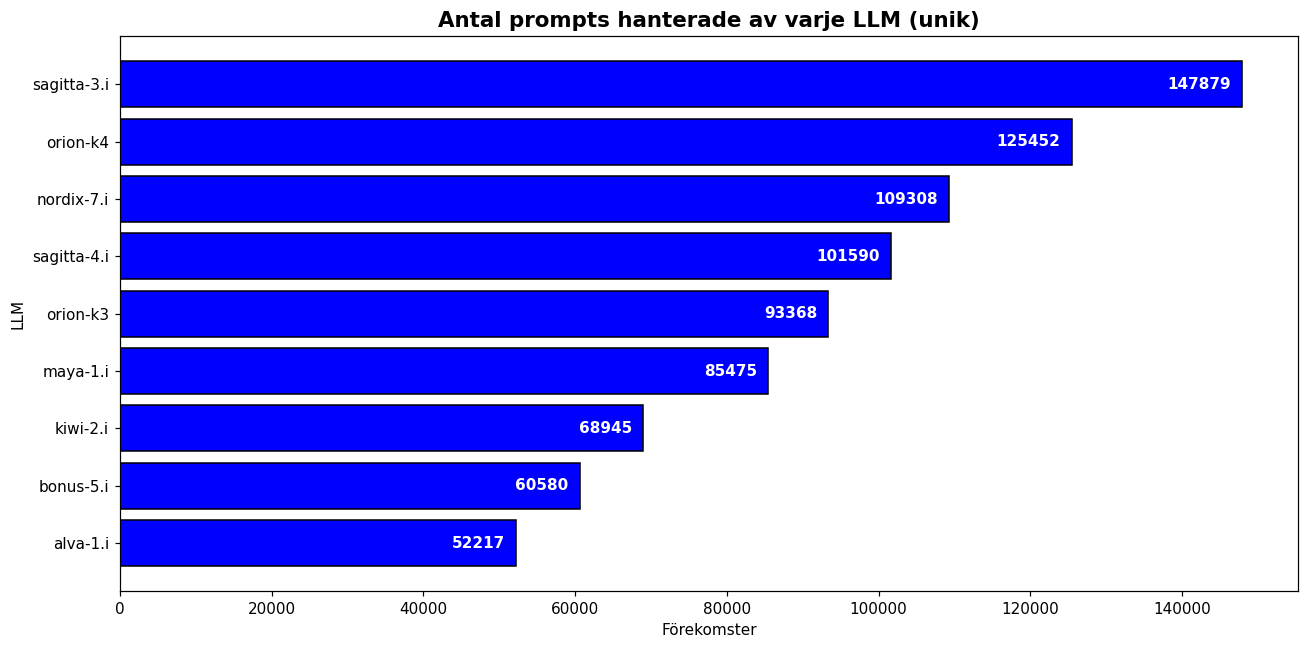

In [176]:
# Vi tar model_counts från kodcellen ovan och sualiserar med ett stapeldiagram 

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.barh(model_counts.index, model_counts.values, color="blue", edgecolor="black")

ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# Titel och axlar
ax.set_title("Antal prompts hanterade av varje LLM (unik)", fontsize=14, weight="bold")
ax.set_xlabel("Förekomster")
ax.set_ylabel("LLM")

# Jag tycker att det blir snyggast med det största värdet överst
ax.invert_yaxis()

# För tydlighets skull skriver vi ut värdet också
xmax = model_counts.values.max()
pad = xmax * 0.01  
for bar in bars:
    w = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(w - pad, y, f"{int(w)}", va="center", ha="right",
            color="white", fontweight="bold")

plt.tight_layout()
plt.show()


### Uppgift 2.2: Vi tittar på samma sak men fokuserar i stället på agenter. 

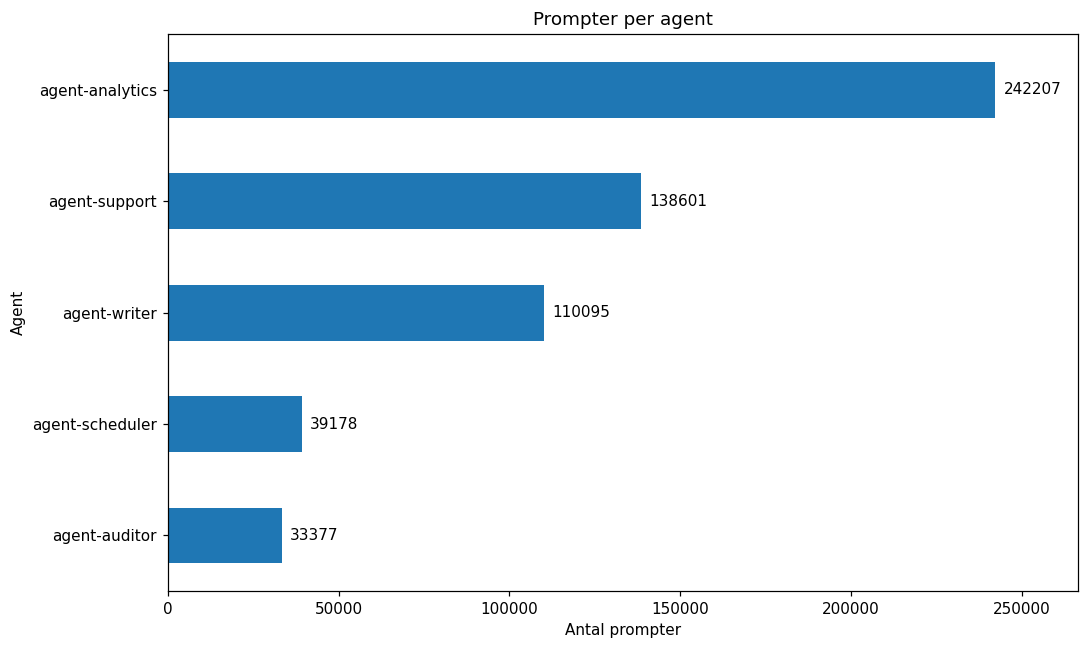

In [177]:
agent_counts = df["Agent_Name"].value_counts()

plt.figure(figsize=(10,6))
ax = agent_counts.plot(kind="barh")
ax.invert_yaxis()  # störst överst

plt.title("Prompter per agent")
plt.xlabel("Antal prompter")
plt.ylabel("Agent")

xmax = agent_counts.max()
ax.set_xlim(0, xmax * 1.10)       
pad = xmax * 0.01

for bar in ax.patches:
    w = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(w + pad, y, f"{int(w)}", va="center", ha="left")

plt.tight_layout()
plt.show()


Jag vet att du gillar liggande staplar, men det är inte riktigt my cup of tea. Fortsättningsvis blir det nog mest stående staplar om inget oförutsett inträffar. 

### Uppgift 2.3 (1): Granska responstiden för agenter och se hur det påverkar användningen.

In [178]:
# Vi använder Pandas groupby och tittar på agenternas responstid i lite olika kategorier för att se hur det ser ut.
agent_response_stats = df.groupby("Agent_Name")["Response_Time"].agg(["min", "max", "mean", "median"])

print(agent_response_stats)
# Vi ignorerar varningen eftersom alla agenter är sina egna kategorier i den här kolumnen och därför ändå finns med i observationen/grupperingen.

                 min   max         mean  median
Agent_Name                                     
agent-analytics  100  7460  1236.494296  1020.0
agent-auditor    100  7103  1237.161488  1020.0
agent-scheduler  100  8000  3838.864975  3299.0
agent-support    100  6904  1236.880607  1020.0
agent-writer     100  6562  1230.802407  1018.0


C:\Users\micha\AppData\Local\Temp\ipykernel_35000\2586519973.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agent_response_stats = df.groupby("Agent_Name")["Response_Time"].agg(["min", "max", "mean", "median"])


Det är tydligt att min-värdet inte fyller någon större funktion här, och även max-värdet är ett "trubbigt verktyg" så vi fokuserar på mean eller median - jag väljer median även om det inte spelar någon större roll för resultatet.  

C:\Users\micha\AppData\Local\Temp\ipykernel_35000\3638629485.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agent_median_response = df.groupby("Agent_Name")["Response_Time"].median()


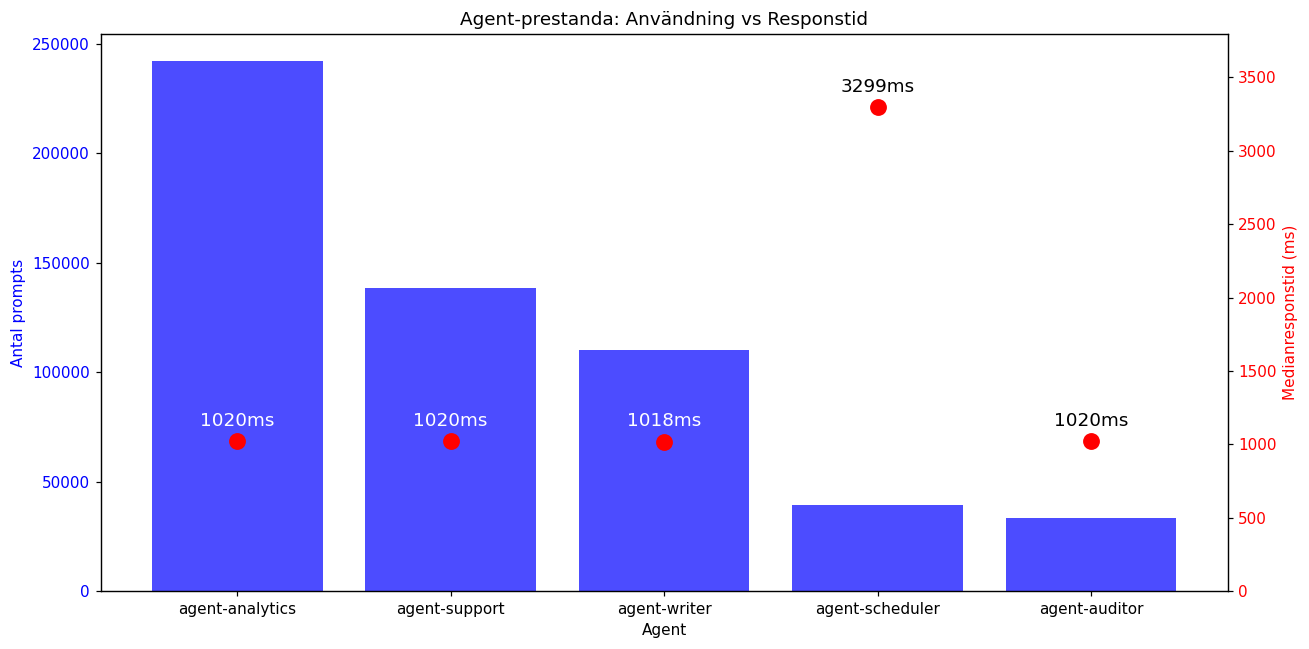

In [179]:
# Mediantid per prompt för varje agent
agent_median_response = df.groupby("Agent_Name")["Response_Time"].median()

# Användning (antal prompts per agent) har vi redan ovan i variabeln "agent_count" så vi återanvänder den.
fig, ax1 = plt.subplots(figsize=(12, 6))

# Blå staplar för antal prompts
bars = ax1.bar(agent_counts.index, agent_counts.values, color="blue", alpha=0.7)
ax1.set_xlabel("Agent")
ax1.set_ylabel("Antal prompts", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Höger y-axel för responstid - experimenterat med linjen, men valde att köra utan
ax2 = ax1.twinx()
ax2.scatter(agent_median_response.index, agent_median_response.values, color="red", s=100, zorder=5)
ax2.set_ylabel("Medianresponstid (ms)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Högsta punkten hamnade lite högt så jag justerar upp y-axeln lite
max_response = agent_median_response.max()
ax2.set_ylim(0, max_response * 1.15)

# Så kör vi in responstidsvärden och ser till att de syns både i och utanför staplarna
for i, (agent, rt) in enumerate(agent_median_response.items()):
    # Kontrollera om punkten ligger över stapelns höjd
    stapel_hojd = agent_counts[agent]
    
    # Om punkten ligger över stapeln (dvs utanför blå området) - använd svart
    # Annars vit för att synas mot blå bakgrund
    if rt > stapel_hojd * (max_response / max(agent_counts.values)):
        text_color = "black"
    else:
        text_color = "white"
    
    ax2.annotate(f"{rt:.0f}ms", (agent, rt), xytext=(0, 10), 
            textcoords="offset points", ha="center", 
            fontsize=12, fontweight="normal", color=text_color)

plt.title("Agent-prestanda: Användning vs Responstid")
plt.xticks(rotation=45)
ax1.grid(False)
ax2.grid(False)
plt.tight_layout()
plt.show()



### Slutsats:

Resultaten visar att det kan finnas ett samband mellan responstid och användning eftersom de tre mest använda agenterna (agent-analytics, agent-support och agent-writer) alla har utmärkta responstider, medan den långsammaste agenten är mycket lite använd. Den minst använda agenten har dock en mycket bra svarstid och här får man kanske söka vidare på vilka faktorer som kan göra att den används så lite - eventuellt kan det handla om funktionalitet eller tillgänglighet, eller något så enkelt som att användarna inte vill använda den.

Sammanfattningsvis visar diagrammet att responstiden är en viktig faktor för användaracceptans, men inte den enda avgörande faktorn.

___

### Uppgift 2.3 (2): Skapa en ny kolumn som anger hur många unika modeller som använts i varje prompt. 

In [180]:
# Antal unika LLM per rad, med trimmade blanksteg
df["LLM_Count"] = (
    df["LLM_Model"]
      .str.split(",")           
      .explode()                
      .str.strip()        
      .str.lower()              
      .groupby(level=0)         
      .nunique()                
      .reindex(df.index, fill_value=0)  
      .astype(int)
)
print(df[["LLM_Model", "LLM_Count"]].head(20))



                                 LLM_Model  LLM_Count
0                                 orion-k4          1
1                                 kiwi-2.i          1
2                              sagitta-4.i          1
3   kiwi-2.i, alva-1.i, orion-k3, orion-k4          4
4                                 maya-1.i          1
5                                 alva-1.i          1
6                 sagitta-4.i, sagitta-3.i          2
7          bonus-5.i, nordix-7.i, orion-k3          3
8                                 kiwi-2.i          1
9             kiwi-2.i, orion-k4, orion-k4          2
10                              nordix-7.i          1
11                              nordix-7.i          1
12                                maya-1.i          1
13                sagitta-3.i, sagitta-3.i          1
14                sagitta-3.i, sagitta-4.i          2
15                                orion-k3          1
16                                orion-k3          1
17                          

### Uppgift 2.4: En visualisering av detta kan göras med ett cirkeldiagram - eftersom jag gissar att det är *andelen* som är intressant, inte *antalet*. 

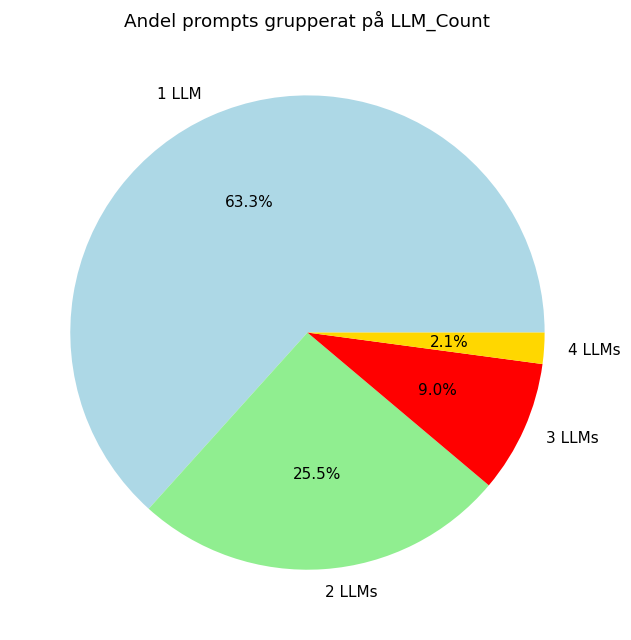

LLM_Count
1    356834
2    143843
3     50830
4     11951
Name: count, dtype: int64


In [181]:
counts = df["LLM_Count"].value_counts().sort_index()

# Jag gillade inte dataetiketterna som standard så här kommer lite tydligare etiketter.
labels = [f"{i} LLM" if i == 1 else f"{i} LLMs" for i in counts.index] 

plt.figure(figsize=(7, 7))
plt.pie(counts.values, labels=labels, autopct="%1.1f%%",
        colors=["lightblue", "lightgreen", "red", "gold"],
        textprops={"fontsize": 10, "weight": "normal"})
plt.title("Andel prompts grupperat på LLM_Count")
plt.show()

# Vi kör ut sifforna också för tydlighets skull.
print(counts)

Här syns fördelningen tydligt och föga förvånande är det sällan mer än två LLMs behövs. 

*Not: Efter "städning" av koden och räkning av endast unika LLM är skillnaden ännu tydligare.*


# Del 3: Användarbeteende – Prompts, segment och trender
___

### Uppgift 3.1: Visa promptanvändning per månad med ett linjediagram.


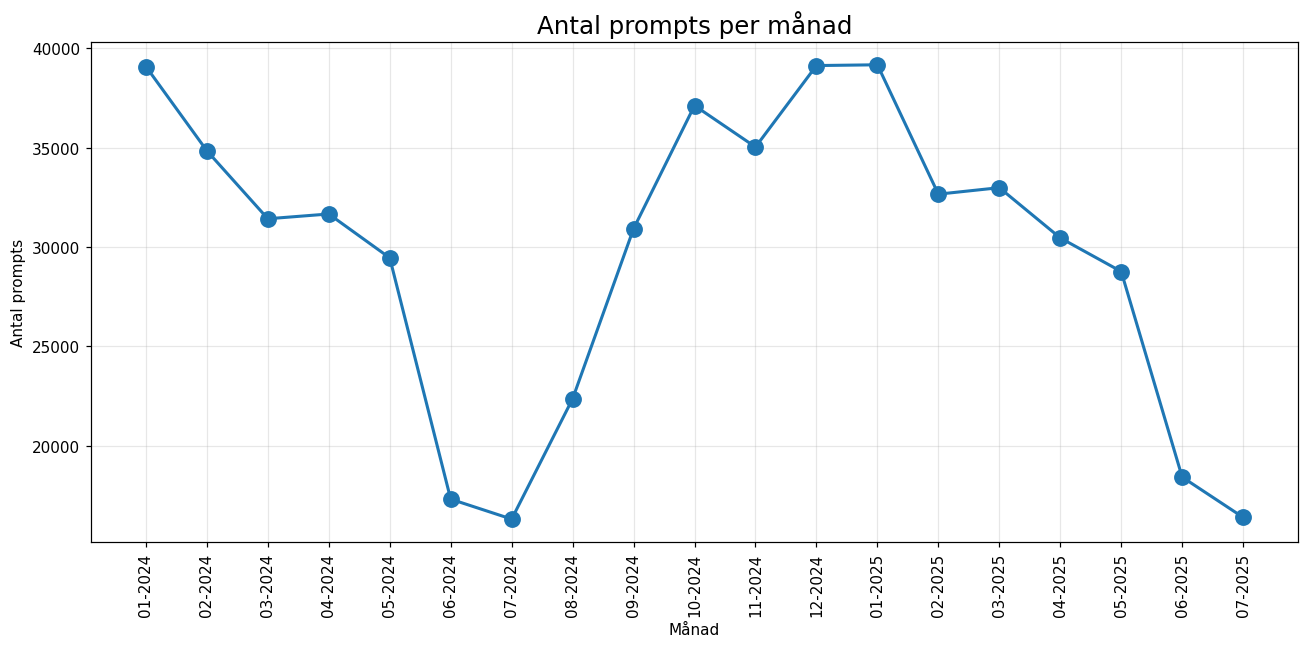

In [182]:
# Gruppera per år-månad för att få kronologisk ordning
monthly_prompts = df.groupby(df["Timestamp"].dt.to_period("M")).size()

plt.figure(figsize=(12, 6))
plt.plot(range(len(monthly_prompts)), monthly_prompts.values,
         marker="o", linewidth=2, markersize=10)

plt.title("Antal prompts per månad", fontsize=16)
plt.xlabel("Månad")
plt.ylabel("Antal prompts")
plt.grid(True, alpha=0.3)

# Sätter år och månad på x-axeln för tydligheten.
simple_labels = []
for period in monthly_prompts.index:
    simple_labels.append(f"{period.month:02d}-{period.year}")

plt.xticks(range(len(monthly_prompts)), simple_labels,
           rotation=90, fontsize=10)

plt.tight_layout()
plt.show()


Det är tydligt att kunderna tar sommarledigt, men märkligt nog redan i juni samt börjar jobba "halvtid" i augusti.

### Uppgift 3.2: Visa hur kunderna anropar agenterna (Access_Method)

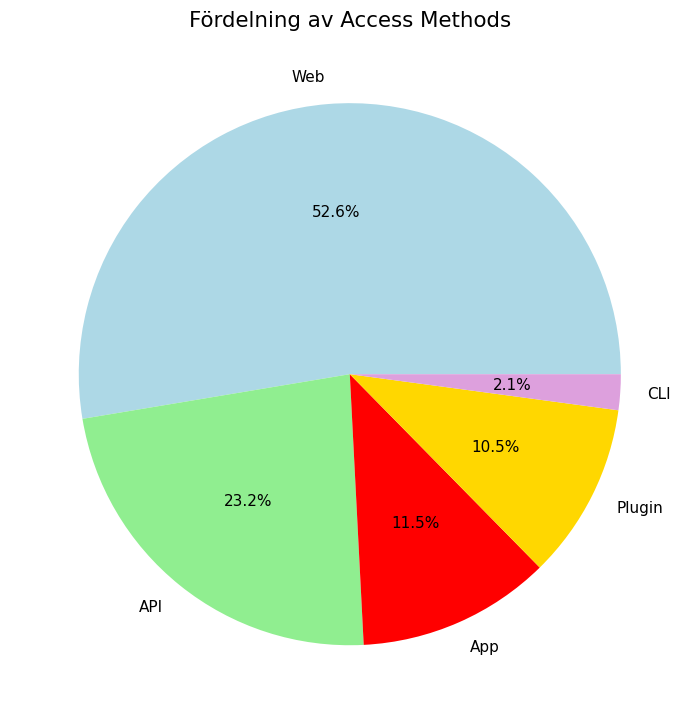

In [183]:
# Vi börjar med att räkna ihop antalet prompts i de olika kategorierna
access_counts = df["Access_Method"].value_counts()

# Cirkeldiagram igen - trevligt med lite runda former ... :D
plt.figure(figsize=(8, 8))
plt.pie(access_counts.values, labels=access_counts.index, 
        autopct="%1.1f%%",
        colors=["lightblue", "lightgreen", "red", "gold", "plum"],
        textprops={"fontsize": 10})  
plt.title("Fördelning av Access Methods", fontsize=14)
plt.show()


En tydlig övervikt för webb och API med App och Plugin ungefär likvärdiga.  

### Uppgift 3.3: Visualisering av prompts per Use Case, Country och Customer Segment.

Alternativ 1: En enkel visualisering med tre parallella diagram.

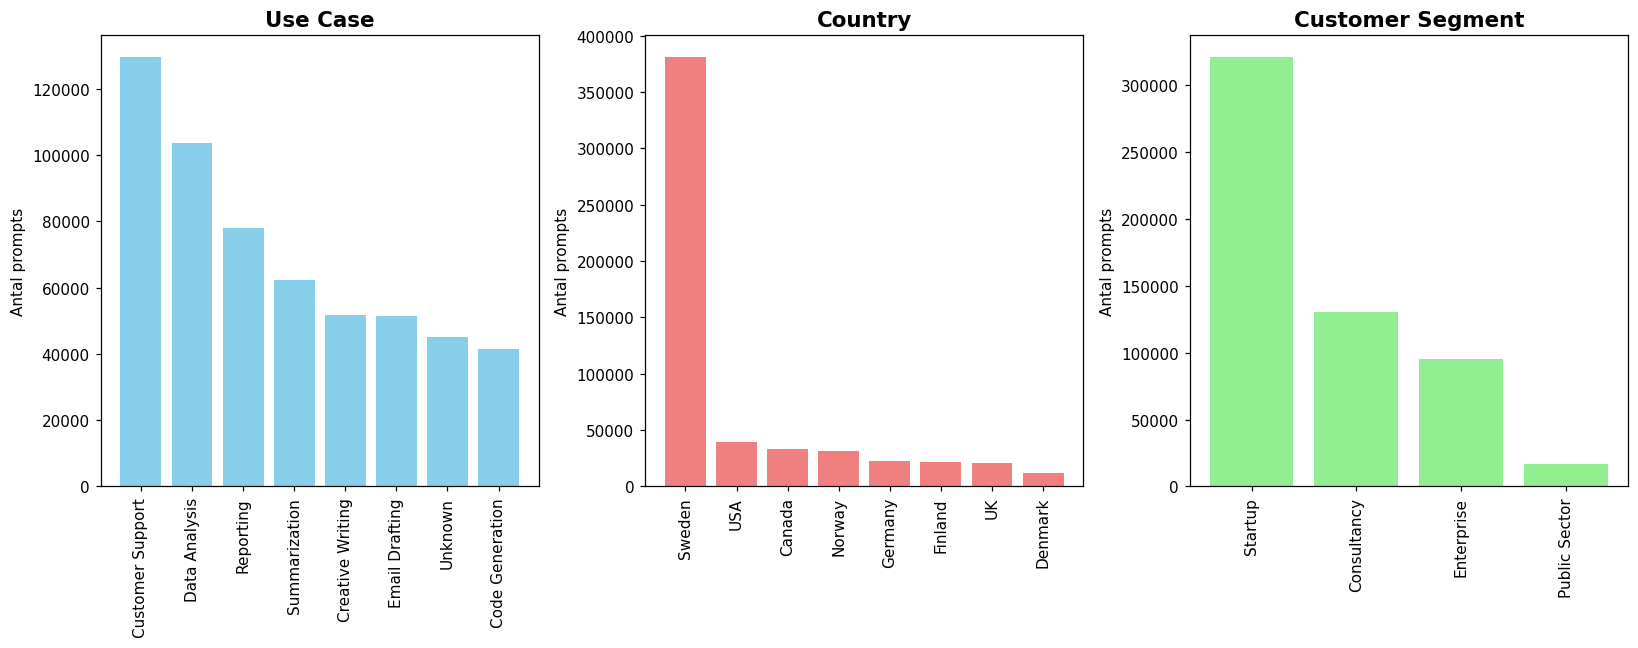

In [184]:
# Räkna antal prompts per kategori
use_case_counts = df['Use_Case'].value_counts()
country_counts = df['Country'].value_counts()
segment_counts = df['Customer_Segment'].value_counts()

# Skapa tre stapeldiagram intill varandra
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

# Use Case diagram
ax1.bar(use_case_counts.index, use_case_counts.values, color='skyblue')
ax1.set_title('Use Case', fontsize=14, fontweight='bold')
ax1.set_ylabel('Antal prompts')
ax1.tick_params(axis='x', rotation=90)

# Country diagram  
ax2.bar(country_counts.index, country_counts.values, color='lightcoral')
ax2.set_title('Country', fontsize=14, fontweight='bold')
ax2.set_ylabel('Antal prompts')
ax2.tick_params(axis='x', rotation=90)

# Customer Segment diagram
ax3.bar(segment_counts.index, segment_counts.values, color='lightgreen')
ax3.set_title('Customer Segment', fontsize=14, fontweight='bold')
ax3.set_ylabel('Antal prompts')
ax3.tick_params(axis='x', rotation=90)

# Justera layout
plt.tight_layout()
plt.show()


Jag arbetade länge (för länge) på ett interaktivt alternativ där prompts och use case visades i ett diagram och där man sedan kunde (som i Power BI) markera kryssrutor för ett eller flera länder samt ett eller flera segment för att få en kombination av use case, land och segment. Ett utmärkt analysverktyg, men jag fick inte till det själv. Till slut tappade jag sugen och lät ChatGPT ta fram det jag ville ha. Blev inte så dumt även om jag nu känner att Power BI skulle vara ett långt bättre alternativ till att kludda med en massa paket och en massa kod för något som annars tagit 10 minuter max.


In [185]:
# Koden nedan är helt AI-skapad - du behöver inte titta på den, 
# men se diagrammet nedan för en idé om hur jag hade tänkt göra det. 
# Tyvärr tog det helt enkelt för mycket tid och får bli något att återkomma till. 

# ===== Interaktivt diagram: Use Case × Land × Segment (med kryssrutor) =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import VBox, HBox, Checkbox, Button, Label, Dropdown, Output

plt.rcParams["figure.dpi"] = 110

# ---------- Hjälpfunktion: checkbox-grupp med "alla/ingen" ----------
def make_checkbox_group(title, options):
    opts = list(dict.fromkeys(sorted(map(str, options))))
    checkboxes = [Checkbox(value=True, description=opt, indent=False) for opt in opts]

    btn_all = Button(description="Markera alla", tooltip=f"Markera alla i {title}")
    btn_none = Button(description="Avmarkera alla", tooltip=f"Avmarkera alla i {title}")

    def on_all(_):
        for cb in checkboxes:
            cb.value = True

    def on_none(_):
        for cb in checkboxes:
            cb.value = False

    btn_all.on_click(on_all)
    btn_none.on_click(on_none)

    header = HBox([Label(f"{title}:"), btn_all, btn_none])
    group = VBox([header] + checkboxes)

    def get_selected():
        return [cb.description for cb in checkboxes if cb.value]

    return group, get_selected

# ---------- Kärnfunktion ----------
def interactive_usecase_chart_df(
    df: pd.DataFrame,
    use_case_col="Use_Case",
    country_col="Country",
    segment_col="Customer_Segment",
    figsize=(11, 6)
):
    # Säkerställ att kolumner finns
    required = {use_case_col, country_col, segment_col}
    missing = required - set(df.columns)
    if missing:
        raise ValueError(f"Saknade kolumner i df: {', '.join(missing)}")

    # Väljbart mått (matchar dina kolumner)
    metric_dropdown = Dropdown(
        options=[
            ("Antal prompts (count)", "__count__"),
            ("Sum Customer_Price_EUR", "Customer_Price_EUR__sum"),
            ("Sum Compute_Cost_EUR", "Compute_Cost_EUR__sum"),
            ("Medel Response_Time", "Response_Time__mean"),
            ("Medel Prompt_Length", "Prompt_Length__mean"),
        ],
        value="__count__",
        description="Mått:"
    )

    # Checkboxar för Länder och Segment
    country_box, get_countries = make_checkbox_group("Länder", df[country_col].unique())
    segment_box, get_segments = make_checkbox_group("Segment", df[segment_col].unique())

    out = Output()

    def compute_agg(fdf, metric_key):
        if metric_key == "__count__":
            g = fdf.groupby([use_case_col, segment_col], dropna=False).size().reset_index(name="Value")
            ylabel = "Antal prompts"
        else:
            col, func = metric_key.split("__", 1)
            if func == "sum":
                g = fdf.groupby([use_case_col, segment_col], dropna=False)[col].sum().reset_index(name="Value")
                ylabel = f"Summa av {col}"
            elif func == "mean":
                g = fdf.groupby([use_case_col, segment_col], dropna=False)[col].mean().reset_index(name="Value")
                ylabel = f"Medelvärde av {col}"
            else:
                raise ValueError("Okänt aggregat.")
        return g, ylabel

    def plot_callback(*_):
        countries = get_countries()
        segments = get_segments()
        metric_key = metric_dropdown.value

        with out:
            out.clear_output(wait=True)

            if len(countries) == 0 or len(segments) == 0:
                fig, ax = plt.subplots(figsize=figsize)
                ax.set_title("Välj minst ett land och minst ett segment.")
                ax.axis("off")
                plt.show()
                return

            # Filtrera
            fdf = df[df[country_col].astype(str).isin(countries) & df[segment_col].astype(str).isin(segments)]
            if fdf.empty:
                fig, ax = plt.subplots(figsize=figsize)
                ax.set_title("Inga rader matchar aktuellt urval.")
                ax.axis("off")
                plt.show()
                return

            # Aggregat & pivot
            g, ylabel = compute_agg(fdf, metric_key)
            piv = g.pivot(index=use_case_col, columns=segment_col, values="Value").fillna(0)

            # Rita grupperade staplar
            fig, ax = plt.subplots(figsize=figsize)
            x = np.arange(len(piv.index))
            series = list(piv.columns)
            n = max(len(series), 1)
            width = min(0.8 / n, 0.3)

            for i, s in enumerate(series):
                ax.bar(x + (i - (n - 1)/2) * width, piv[s].values, width=width, label=str(s))

            ax.set_xticks(x)
            ax.set_xticklabels([str(u) for u in piv.index], rotation=0, ha="center")
            ax.set_xlabel("Use Case")
            ax.set_ylabel(ylabel)

            title_c = ", ".join(countries) if len(countries) <= 5 else f"{len(countries)} länder valda"
            title_s = ", ".join(segments)  if len(segments)  <= 5 else f"{len(segments)} segment valda"
            ax.set_title(f"Use Case per Segment – {metric_dropdown.label}\nUrval – Länder: {title_c} | Segment: {title_s}")

            ax.legend(title="Segment")
            ax.grid(axis="y", linestyle="--", alpha=0.35)
            fig.tight_layout()
            plt.show()

    # Reagera på ändringar
    for child in country_box.children[1:]:
        child.observe(plot_callback, names="value")
    for child in segment_box.children[1:]:
        child.observe(plot_callback, names="value")
    metric_dropdown.observe(plot_callback, names="value")

    # Första render
    plot_callback()

    return VBox([
        HBox([country_box, segment_box], layout={'justify_content': 'space-between'}),
        metric_dropdown,
        out
    ])

# === ANROP (matchar dina kolumner) ===
ui = interactive_usecase_chart_df(
    df=df,                           # Din DataFrame i notebooken
    use_case_col="Use_Case",
    country_col="Country",
    segment_col="Customer_Segment",
    figsize=(11, 6)
)

ui  # Visa UI


### Uppgift 3.4: Fördelning prompts per veckodag.

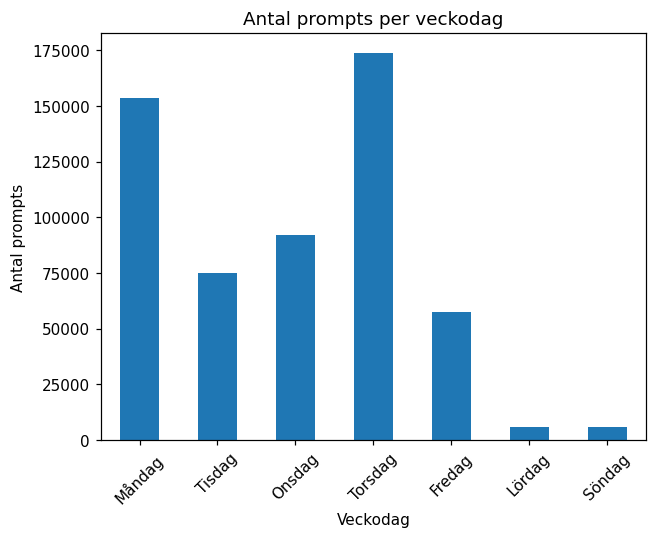

In [186]:
# Mappa veckodagar
veckodagar = {0: "Måndag", 1: "Tisdag", 2: "Onsdag", 3: "Torsdag",
              4: "Fredag", 5: "Lördag", 6: "Söndag"}

# Räkna antal rader (prompts) per veckodag
counts = df["Timestamp"].dt.dayofweek.map(veckodagar).value_counts().reindex(veckodagar.values())

# Rita stapeldiagram
counts.plot(kind="bar")
plt.ylabel("Antal prompts")
plt.xlabel("Veckodag")
plt.title("Antal prompts per veckodag")
plt.xticks(rotation=45)
plt.show()


### Uppgift 3.5 - visa hur prompts fördelas över dygnet. 

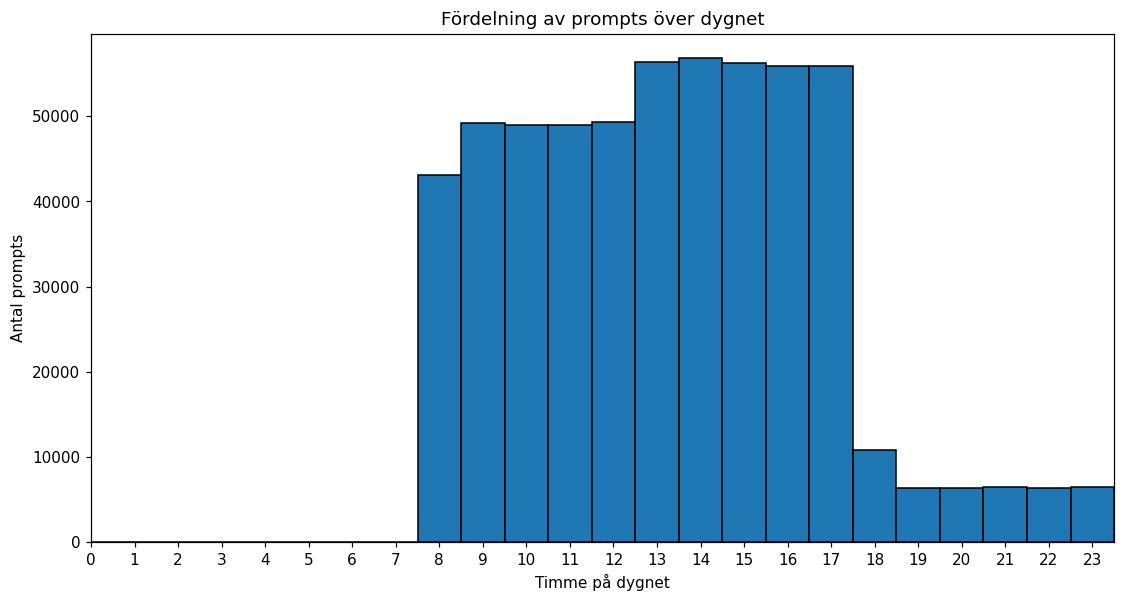

In [208]:
# Ta fram timme (0–23)
hours = df["Timestamp"].dt.hour

# Rita ett histogram
plt.figure(figsize=(12,6))
plt.hist(hours, bins=24, range=(0,24), edgecolor="black", align="left")
plt.xlabel("Timme på dygnet")
plt.ylabel("Antal prompts")
plt.title("Fördelning av prompts över dygnet")
plt.xticks(range(0,24))
plt.xlim(0,23.5)
plt.show()


Det är tydligt att om det ska vara underhåll med downtime är det 00-08 vi ska lägga det arbetet.

Mellan 13 och 18 kan vi boosta lite extra och i gengäld spara rejält efter 18. 

# Del 4: Vinst, marginaler och värde
___

### Uppgift 4.1: Skapa de två nya kolumnerna Profit_EUR och Margin_Pct


In [ ]:
# Det här var en behaglig uppgift så här långt in i arbetet. Äntligen något som jag kunde själv ...
df["Profit_EUR"] = df["Customer_Price_EUR"] - df["Compute_Cost_EUR"]
df["Margin_Pct"] = df["Profit_EUR"] / df["Customer_Price_EUR"] * 100



C:\Users\micha\AppData\Local\Temp\ipykernel_35000\1363825800.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["Margin_Pct_Weighted_Avg"] = 100* (df.groupby("Agent_Name")["Profit_EUR"].transform("sum") / \
C:\Users\micha\AppData\Local\Temp\ipykernel_35000\1363825800.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Agent_Name")["Customer_Price_EUR"].transform("sum"))


In [231]:
# Snabbkoll
df[["Agent_Name", "Profit_EUR", "Margin_Pct"]].head(20)


,Agent_Name,Profit_EUR,Margin_Pct
0,agent-auditor,0.0034,26.771652
1,agent-analytics,0.0086,38.738735
2,agent-analytics,0.0038,37.999996
3,agent-support,0.0210,46.874996
4,agent-support,0.0036,33.027519
5,agent-writer,0.0090,48.913048
6,agent-scheduler,0.0095,48.969074
7,agent-auditor,0.0056,24.137930
8,agent-support,0.0016,36.363636
9,agent-scheduler,0.0090,29.801331


### Uppgift 4.2: Visa vinst och marginal per agent. 

C:\Users\micha\AppData\Local\Temp\ipykernel_35000\2587074045.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metrics = df.groupby("Agent_Name").agg({


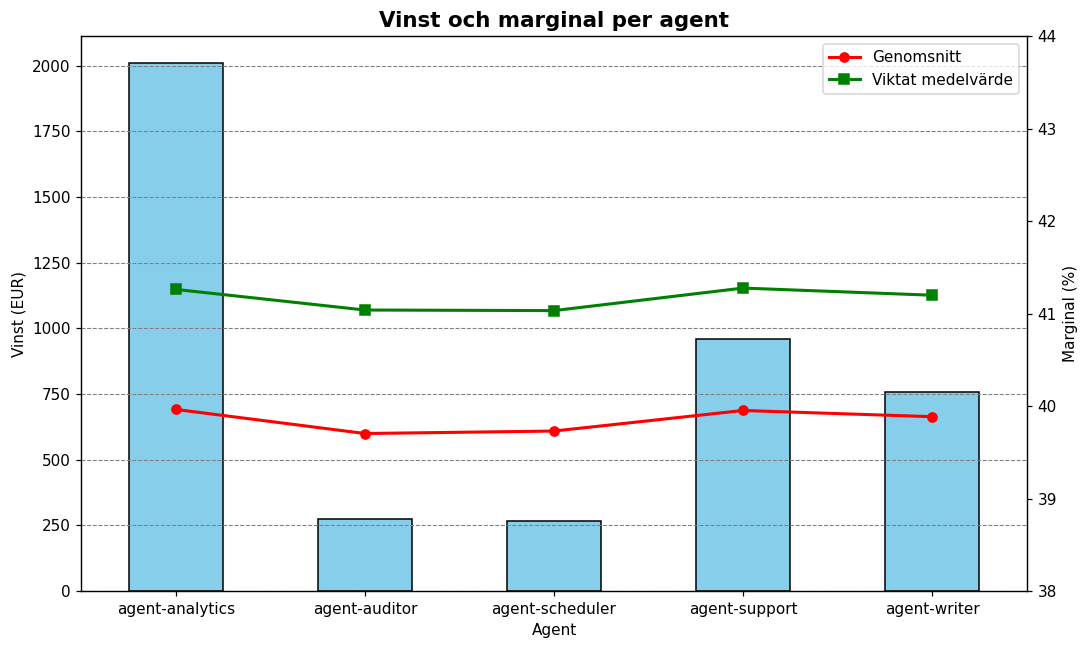

In [232]:
# Vi börjar med att gruppera och beräkna värden (kör också en *vägd* marginal (som är bättre för KPI))
metrics = df.groupby("Agent_Name").agg({
    "Profit_EUR": "sum",
    "Margin_Pct": "mean",
    "Customer_Price_EUR": "sum"
})

metrics["Margin_Pct_Weighted_Avg"] = 100 * (
    metrics["Profit_EUR"] / metrics["Customer_Price_EUR"])

fig, ax1 = plt.subplots(figsize=(10,6))

# Vi lägger vinsten på y-axeln och plottar med staplar
metrics["Profit_EUR"].plot(kind="bar", ax=ax1, color="skyblue", edgecolor="black", rot=0)
ax1.set_ylabel("Vinst (EUR)")
ax1.set_xlabel("Agent")

# Ny axel för marginaler (höger y-axel)
ax2 = ax1.twinx()
metrics["Margin_Pct"].plot(kind="line", ax=ax2, color="red", marker="o", linewidth=2, label="Genomsnitt")
metrics["Margin_Pct_Weighted_Avg"].plot(kind="line", ax=ax2, color="green", marker="s", linewidth=2, label="Viktat medelvärde")
ax2.set_ylabel("Marginal (%)")
plt.ylim(38, 44)

ax2.legend(loc="upper right")

# Titel, grid och layout
plt.title("Vinst och marginal per agent", fontsize=14, weight="bold")
ax1.set_facecolor("white")
ax1.grid(axis="y", color="gray", linestyle="--", linewidth=0.7)

fig.tight_layout()
plt.show()


Ungefär här hajade jag till och undrade om jag gjort något större fel. Tjänar de bara runt 4000 euro totalt? På halvannat år? 

In [234]:
print(df["Profit_EUR"].sum())

4271.1514


Mycket riktigt. En fjuttsiffra med tanke på alla kunde och alla prompts. 

### Uppgift 4.3: Beräkna vinst och marginal i snitt grupperat på agent, use case och segment. 

Vi börjar med att skapa funktionen. 

In [191]:
def avg_values (df, group_col):
    return (
        df.groupby(group_col)
          .agg(Profit_EUR_avg=("Profit_EUR", "mean"),
               Margin_Pct_avg=("Margin_Pct", "mean"))
          .reset_index()
    )

# En liten test. Komentering för val av värde (annars får vi bara sista). 
# avg_values(df, "Agent_Name").head()
avg_values(df, "Use_Case").head()
# avg_values(df, "Customer_Segment").head()

C:\Users\micha\AppData\Local\Temp\ipykernel_35000\3994488535.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)


,Use_Case,Profit_EUR_avg,Margin_Pct_avg
0,Code Generation,0.008316,39.970600
1,Creative Writing,0.006904,39.958729
2,Customer Support,0.006948,40.022038
3,Data Analysis,0.008311,40.022827
4,Email Drafting,0.006898,40.019306


Så gör vi en visualisering. Tre separata diagram får duga.  

C:\Users\micha\AppData\Local\Temp\ipykernel_35000\3994488535.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)
C:\Users\micha\AppData\Local\Temp\ipykernel_35000\3994488535.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)
C:\Users\micha\AppData\Local\Temp\ipykernel_35000\3994488535.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)


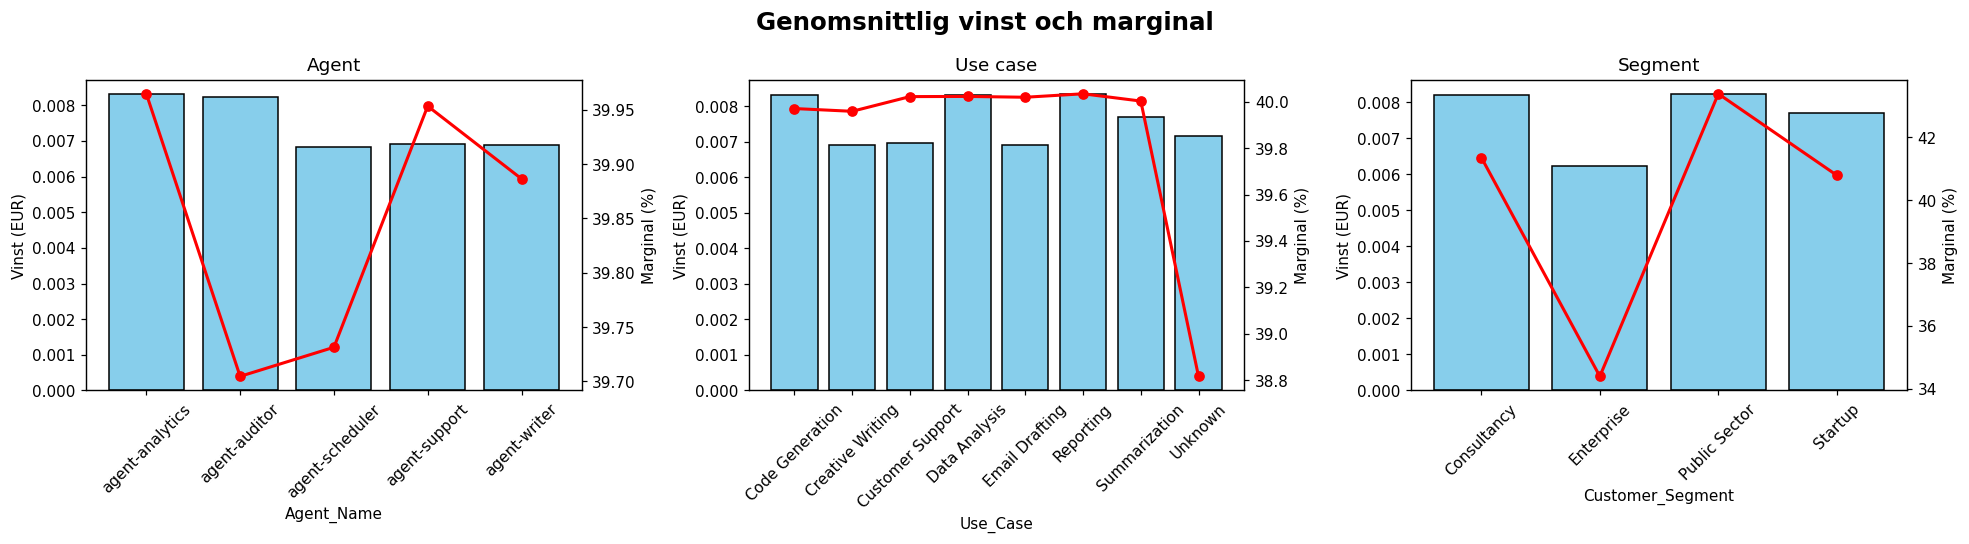

In [192]:
groupings = ["Agent_Name", "Use_Case", "Customer_Segment"]
titles = ["Agent", "Use case", "Segment"]

fig, axes = plt.subplots(1, 3, figsize=(18,5))

for ax, col, title in zip(axes, groupings, titles):
    # Gruppberäkning
    data = avg_values(df, col)
    x = data[col]
    
    # Staplar för Profit_EUR_avg (vänster y-axel)
    ax.bar(x, data["Profit_EUR_avg"], color="skyblue", edgecolor="black")
    ax.set_ylabel("Vinst (EUR)")
    ax.set_xlabel(col)
    ax.set_title(title)
    ax.tick_params(axis="x", rotation=45)
    
    # Linje för Margin_Pct_avg (höger y-axel)
    ax2 = ax.twinx()
    ax2.plot(x, data["Margin_Pct_avg"], color="red", marker="o", linewidth=2)
    ax2.set_ylabel("Marginal (%)")

fig.suptitle("Genomsnittlig vinst och marginal", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


Inte missnöjd med det där. Kanske kunde göras bättre/snyggare, men "don't let better be the enemy of good". Här syns också att Unknown (där det saknades Use Case-data) har riktigt kass marginal - undrar vad som pågår där. Ett par av agenterna skulle kanske kunna skippas (de med sämst marginal) och det är inget snack om att Enterprise-kunder har ett alldeles för lågt pris om man tittar på marginalen där. 

# Del 5: Lönsamhet på Kundnivå
___

### Uppgift 5.1: Visa antalet kunder

In [193]:
# Ännu en riktigt skön uppgift där man kan få bidra med sin egen (lilla) talang. 

antal_kunder = df["Customer_Name"].nunique()
kundlista = sorted(df["Customer_Name"].unique().tolist())

print(f"Kundlista (totalt {antal_kunder} kunder)\n****************************")

for kund in kundlista:
    print(kund)


Kundlista (totalt 21 kunder)
****************************
AlvAI AB
Best Practice LLC
DataForge Inc
DataSphere Ltd
DreamMinds AS
Elytic LLC
Garmo Tech A/S
Geostar Ltd
HyperByte Inc
Kira Consulting AB
Lumivaara Oy
MiTech GmbH
NeuroNova AB
Neurolytics GmbH
NordicAI Solutions AS
NovaLogic AB
SmartData AB
Storsjö Sjukhus
TechNova AS
Tekoälyverkko Oy
Waver Group AB


### Uppgift 5.2: Skapa nytt dataframe

Enligt instruktion skapas här ett nytt dataframe med fem kolumner. De är relativt självklara överlag, men eventuellt skulle Avg_Margin_Precentage kanske ha varit ett viktat medelvärde istf en enkel "mean". Eftersom vi snackar hundradelar, ev. tiondelar som skiljer så har jag inte brytt mig om att göra det. 

In [ ]:
# Nytt dataframe aggregerat på kundnivå
df_customer = (
    df.groupby("Customer_Name")
      .agg(
          Total_Prompts=("Customer_Name", "count"),   
          Total_Revenue=("Customer_Price_EUR", "sum"),
          Total_Cost=("Compute_Cost_EUR", "sum"),
          Total_Profit=("Profit_EUR", "sum"),
          Avg_Margin_Pct=("Margin_Pct", "mean")
      )
      .reset_index()
)

# Snabb koll 
df_customer.info()
df_customer.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Customer_Name   21 non-null     category
 1   Total_Prompts   21 non-null     int64   
 2   Total_Revenue   21 non-null     float32 
 3   Total_Cost      21 non-null     float32 
 4   Total_Profit    21 non-null     float32 
 5   Avg_Margin_Pct  21 non-null     float32 
dtypes: category(1), float32(4), int64(1)
memory usage: 1.3 KB


C:\Users\micha\AppData\Local\Temp\ipykernel_35000\1796335313.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Customer_Name")


,Customer_Name,Total_Prompts,Total_Revenue,Total_Cost,Total_Profit,Avg_Margin_Pct
0,AlvAI AB,56165,1197.603149,609.592529,588.010620,49.057602
1,Best Practice LLC,21178,433.030090,228.809708,204.220398,47.115658
2,DataForge Inc,9378,163.783401,101.100304,62.683102,38.234554
3,DataSphere Ltd,12940,284.110199,138.398407,145.711807,51.240150
4,DreamMinds AS,15311,203.070007,166.926697,36.143299,17.796721


Det är oklart vad som är "rimlig kolumn" här, men gissningsvis vill man veta hur mycket pengar det handlar om. Och då känns det mest rätt att sortera på vilka företag vi tjänar mest pengar på. Jag som har lite lätt OCD skulle dock vilja ha det sorterat på namn, men ... whatever. It's fine ... :D

In [ ]:
# Sortera df_customers så att de vi tjänar mest på kommer först
df_customer = df_customer.sort_values("Total_Profit", ascending=False)

# En liten koll
df_customer.head()

NameError: name 'df_customer' is not defined

### Uppgift 5.3: Visualisera och analysera sambandet mellan antal prompts och genomsnittlig marginal per kund.

Här fanns lite experimentlusta, men när jag tog en ny titt på koden så insåg jag att jag krånglat till det i onödan - lät det dock ligga kvar som exempel på vad man skulle kunna ha gjort. 

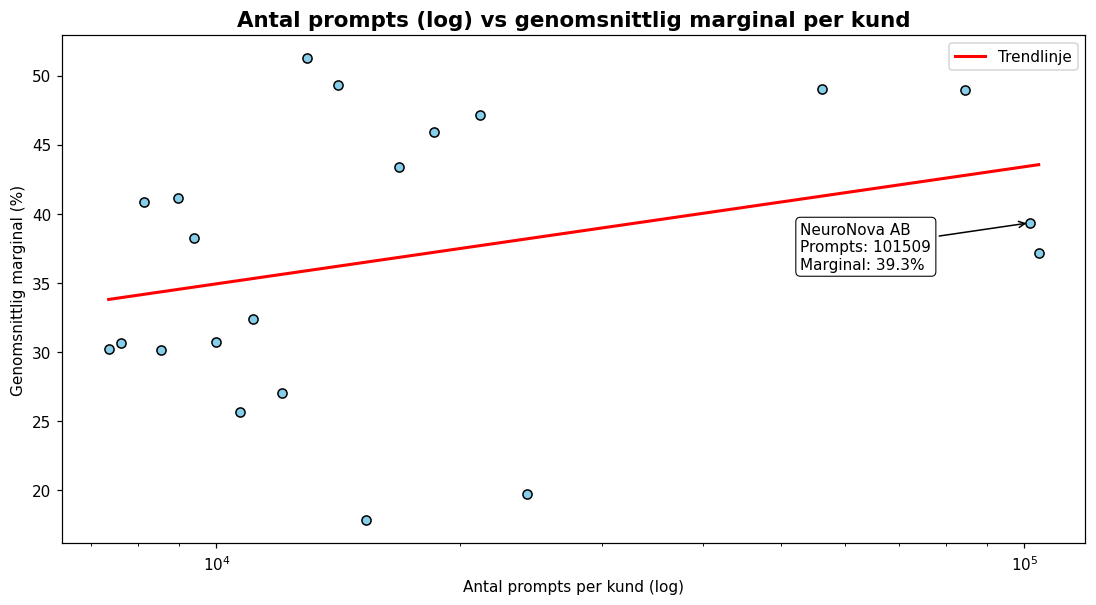

In [261]:
# Vi gör ett scatterplot för det här - och gör x-axeln logaritmisk för större tydlighet. 

plt.figure(figsize=(12,6))
plt.scatter(
    df_customer["Total_Prompts"], 
    df_customer["Avg_Margin_Pct"], 
    color="skyblue", edgecolor="black"
)

# Lika bra att ta med en trendlinje för att svara på frågan om det finns något samband
x = df_customer["Total_Prompts"]
y = df_customer["Avg_Margin_Pct"]

coef = np.polyfit(np.log(x), y, 1)  
poly1d_fn = np.poly1d(coef)

x_sorted = np.sort(x)
plt.plot(
    x_sorted, 
    poly1d_fn(np.log(x_sorted)), 
    color="red", linewidth=2, label="Trendlinje"
)

plt.legend()

plt.xscale("log") 

plt.title("Antal prompts (log) vs genomsnittlig marginal per kund", fontsize=14, weight="bold")
plt.xlabel("Antal prompts per kund (log)")
plt.ylabel("Genomsnittlig marginal (%)")
# Hade en grid här, men den blev inte snygg så vi testar utan den.
# plt.grid(True, linestyle="--", alpha=0.7, which="both")  

# Varför inte göra det lite extra tydligt och visa värden för valfri kund. 

kund = "NeuroNova AB"
rad = df_customer[df_customer["Customer_Name"] == kund].iloc[0]

# Jag har valt en slumpvis kund, men det hade gått utmärkt att ha en input här, inte så komplicerat, 
# men man måste då placera texten dynamiskt och jag kom på det här lite sent för att orka trassla.
#
#   kund = input("Ange vilken kund du vill visa värden för: ").strip()
#   if kund not in df_customer["Customer_Name"].values:
#       print(f"Kunden '{kund}' finns inte i data. Kontrollera stavning.")
#   else:
#       rad = df_customer[df_customer["Customer_Name"] == kund].iloc[0]

plt.annotate(
    f"{kund}\nPrompts: {rad['Total_Prompts']}\nMarginal: {rad['Avg_Margin_Pct']:.1f}%",
    xy=(rad["Total_Prompts"], rad["Avg_Margin_Pct"]),       
    xytext=(-150, -30),                                        
    textcoords="offset points",                             
    arrowprops=dict(arrowstyle="->", color="black"),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.7)
)

plt.show()


Trots att trendlinjen tycks visa ett positivt samband (d.v.s. att kunder med fler prompts i genomsnitt har högre marginal) är sambandet inte särskilt starkt eftersom marginalen varierar så mycket bland kunder med liknande antal prompts. En snabb koll av Pearsons korrelationskoefficient bekräftar detta eftersom värdet ligger nära noll, förvisso på den positiva sidan, och alltså innebär ett svagt, men inte signifikant samband mellan antalet prompts och marginalen.

### Uppgift 5.4: De fem bästa kunderna (användning/lönsamhet)


Jag tolkar här frågan som att vi ska visa de fem kunder som har flest prompts och de fem kunder vi tjänar mest på. Jag lägger båda i ett diagram (med olika värden på olika axlar) och varför inte återgå till "någons" favorit med liggande staplar.

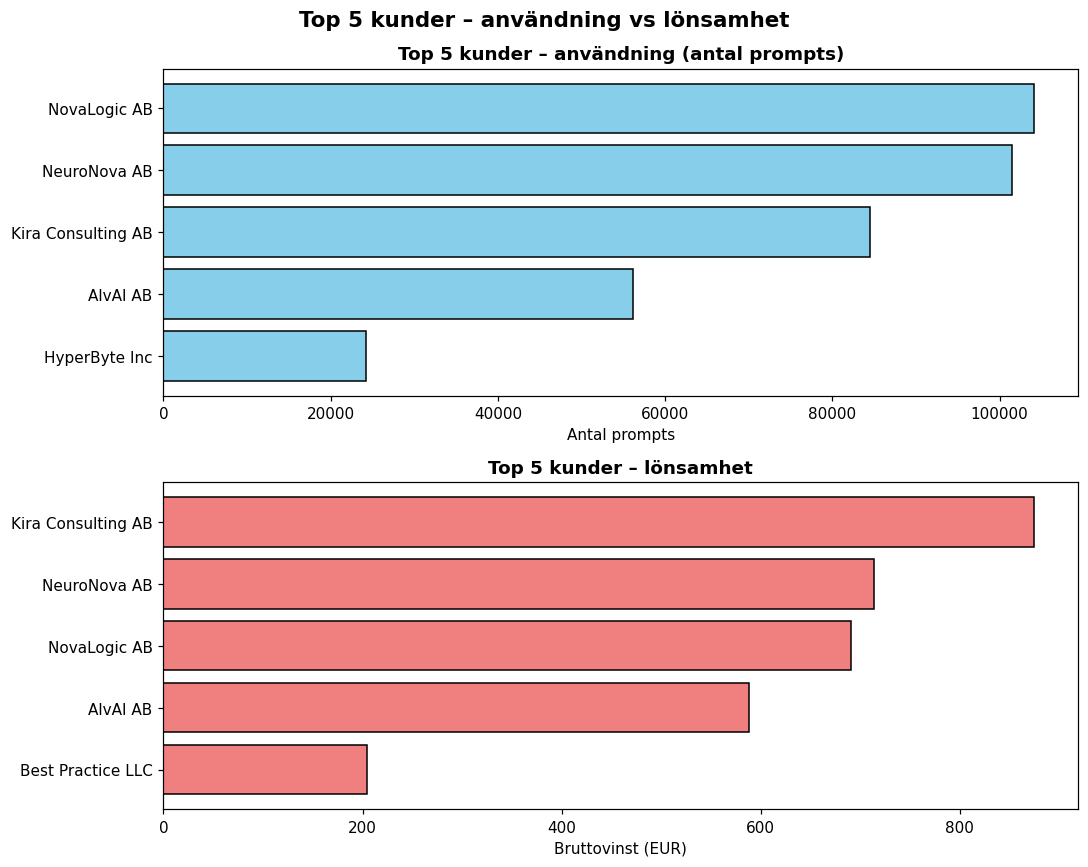

In [198]:
# Top 5 efter användning
top_prompts = df_customer.nlargest(5, "Total_Prompts").sort_values("Total_Prompts")

# Top 5 efter vinst
top_profit = df_customer.nlargest(5, "Total_Profit").sort_values("Total_Profit")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=False)

# --- Övre diagram: mest använda kunder ---
ax1.barh(top_prompts["Customer_Name"], top_prompts["Total_Prompts"], color="skyblue", edgecolor="black")
ax1.set_title("Top 5 kunder – användning (antal prompts)", fontsize=12, weight="bold")
ax1.set_xlabel("Antal prompts")

# --- Nedre diagram: mest lönsamma kunder ---
ax2.barh(top_profit["Customer_Name"], top_profit["Total_Profit"], color="lightcoral", edgecolor="black")
ax2.set_title("Top 5 kunder – lönsamhet", fontsize=12, weight="bold")
ax2.set_xlabel("Bruttovinst (EUR)")

plt.suptitle("Top 5 kunder – användning vs lönsamhet", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


Om vi i stället tolkar uppgiften som att bara visa fem kunder och då välja de "som är bäst sett till användning och lönsamhet" är antagandet att det är kunder vi tjänar mycket på, men som använder systemet lite. 

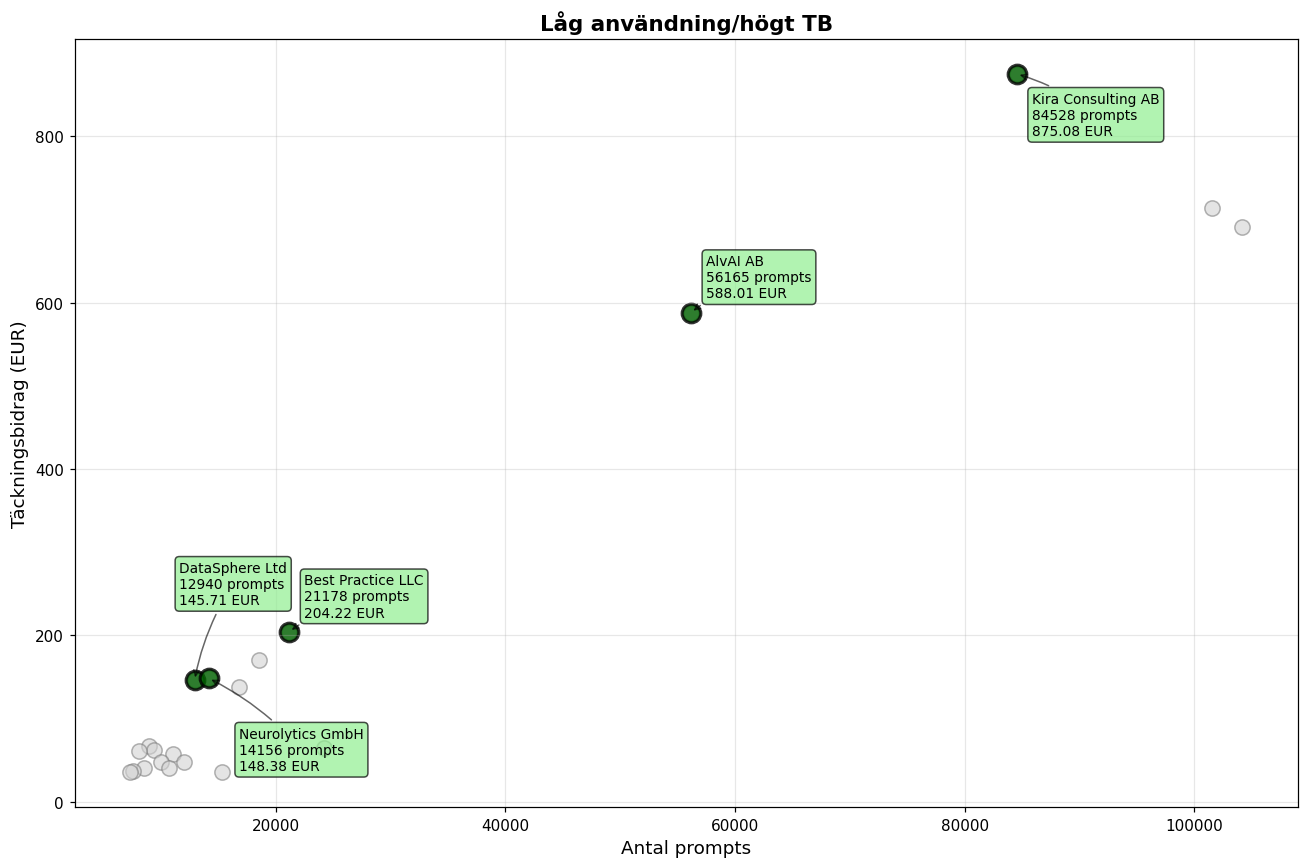

In [ ]:
# Beräkna TB per prompt (effektivitetsratio)
df_customer["Profit_Per_Prompt"] = df_customer["Total_Profit"] / df_customer["Total_Prompts"]

# Top 5 mest effektiva kunder (för etiketter)
top_efficient = df_customer.nlargest(5, "Profit_Per_Prompt")

plt.figure(figsize=(12, 8))

# Plotta alla kunder
scatter = plt.scatter(df_customer["Total_Prompts"], df_customer["Total_Profit"], 
                     s=100, color="lightgray", alpha=0.6, edgecolors="gray", linewidth=1)

# Highlight de fem mest effektiva kunderna
scatter_top = plt.scatter(top_efficient["Total_Prompts"], top_efficient["Total_Profit"], 
                         s=150, color="darkgreen", alpha=0.8, edgecolors="black", linewidth=2)

# Manuella offsetpositioner för att undvika överlappning
offsets = [
    (-10, 50),   # Första kunden - standard position
    (20, -60), # Andra kunden - vänster och ner
    (10, 10),   # Tredje kunden - höger och upp
    (10, -40),  # Fjärde kunden - höger och ner  
    (10, 10)    # Femte kunden - standard position
]

# Dataetiketter bara för de fem highlightade med olika positioner
for i, (idx, row) in enumerate(top_efficient.iterrows()):
    plt.annotate(f"{row['Customer_Name']}\n{row['Total_Prompts']:.0f} prompts\n{row['Total_Profit']:.2f} EUR", 
                xy=(row['Total_Prompts'], row['Total_Profit']),
                xytext=offsets[i], textcoords="offset points",
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
                fontsize=9, ha="left",
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.1", alpha=0.6))

plt.xlabel("Antal prompts", fontsize=12)
plt.ylabel("Täckningsbidrag (EUR)", fontsize=12) 
plt.title("Låg användning/högt TB", fontsize=14, fontweight="bold")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Uppgift 5.5: Ta fram ny KPI, "Efficiency Index"
Formel: *efficiency index = (total profit / total prompts) * 1000*

Det här blir nästan samma sak som ovan, men det beror kanske på att jag tolkade 5.4 fel i mitt andra antagande.

In [251]:
# Vi börjar med att skapa kolumnen i vårt nya dataframe
df_customer["Efficiency_Index"] = df_customer["Total_Profit"] / df_customer["Total_Prompts"] * 1000

# Snabb koll
print("Nya efficiency index per kund (sorterat fallande):")
print(
    df_customer[["Customer_Name", "Efficiency_Index"]]
    .sort_values("Efficiency_Index", ascending=False)
)


Nya efficiency index per kund (sorterat fallande):
            Customer_Name  Efficiency_Index
3          DataSphere Ltd         11.260572
13       Neurolytics GmbH         10.481683
0                AlvAI AB         10.469342
9      Kira Consulting AB         10.352504
1       Best Practice LLC          9.643045
5              Elytic LLC          9.179474
17        Storsjö Sjukhus          8.215528
14  NordicAI Solutions AS          7.530575
16           SmartData AB          7.438117
12           NeuroNova AB          7.032773
2           DataForge Inc          6.684059
15           NovaLogic AB          6.630012
10           Lumivaara Oy          5.143753
18            TechNova AS          4.801849
20         Waver Group AB          4.762364
7             Geostar Ltd          4.755882
11            MiTech GmbH          4.679621
6          Garmo Tech A/S          3.998099
19       Tekoälyverkko Oy          3.791942
8           HyperByte Inc          2.662752
4           DreamMinds AS

Så ska vi visualisera detta för ledningsgruppen. Jag provade ett par olika sätt och valde det här för att visa vilka kunder vi ska fokusera mer på och vilka som är mindre viktiga. Det andra alternativet var ett pareto-diagram, men det gav inte samma tydliga intryck.   

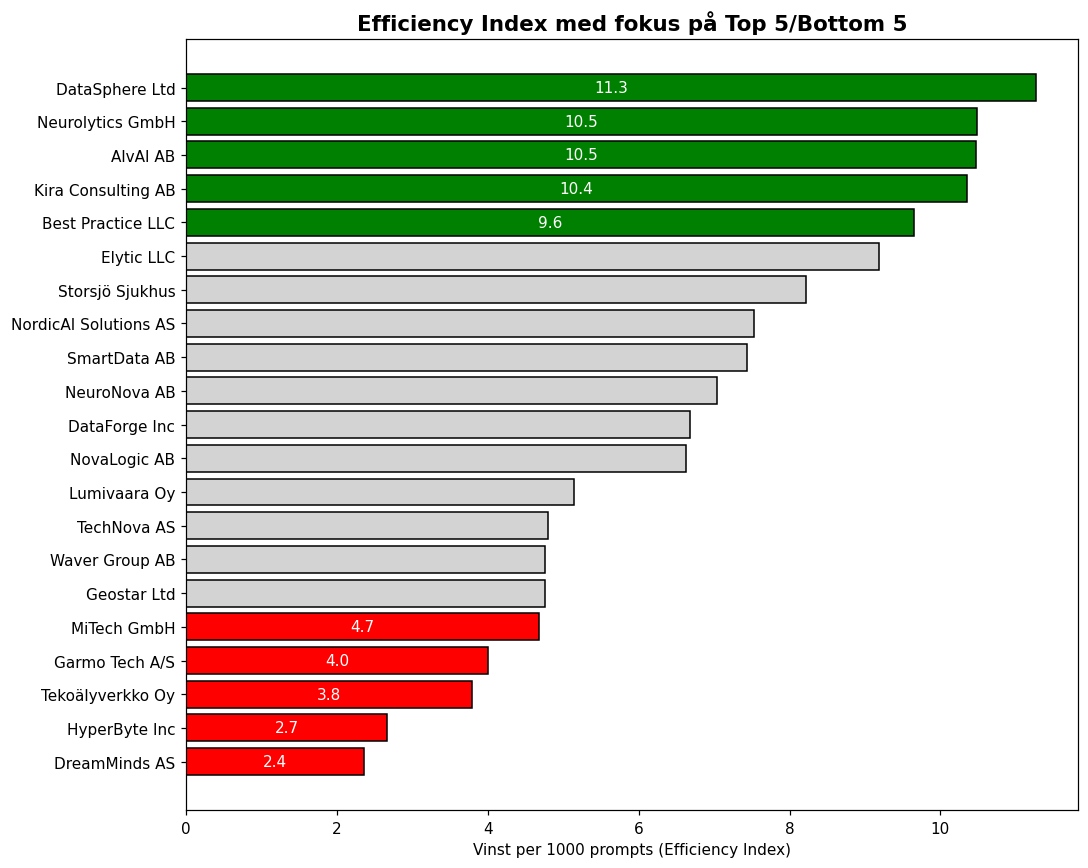

In [260]:
# Jag har tänkt mig att jag vill ha de bästa överst (och sorterade först ascending=False, men så lärde jag mig att matplotlib tänker "bakvänt")
eff = df_customer[["Customer_Name", "Efficiency_Index"]].sort_values("Efficiency_Index", ascending=True)

# Så kör vio en top/bottom highlight
colors = ["lightgray"] * len(eff)
top_n = min(5, len(eff))
bot_n = min(5, len(eff))
for i in range(top_n):
    colors[i] = "red"
for i in range(bot_n):
    colors[-(i+1)] = "green"

plt.figure(figsize=(10, 8))
plt.barh(eff["Customer_Name"], eff["Efficiency_Index"], color=colors, edgecolor="black")

# Här lade jag till dataetiketter på de highlightade staplarna. Blev inte så dumt. 
for i, (customer, efficiency) in enumerate(zip(eff["Customer_Name"], eff["Efficiency_Index"])):
    # Top 5 (första 5) eller Bottom 5 (sista 5)
    if i < top_n or i >= len(eff) - bot_n:
        plt.text(efficiency / 2,  
                i,              
                f"{efficiency:.1f}",  
                ha="center",    
                va="center",    
                color="white",  
                fontweight="normal",  
                fontsize=10)
plt.title("Efficiency Index med fokus på Top 5/Bottom 5", fontsize=14, weight="bold")
plt.xlabel("Vinst per 1000 prompts (Efficiency Index)")
plt.tight_layout()
plt.show()



Det här känns ganska tydligt. Och så liggande staplar – tur att det är sista uppgiften så jag kan sluta fjäska nu ... :D